<img src = 'Images/1-156039trapezium.jpeg'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [3]:
mangaid = '1-156039'
nsa_z = 0.114699
plateifu = '8439-3704'

In [4]:
drpall_list = fits.open("/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/platelist-v2_4_3.fits")

In [5]:
objlist = drpall_list[2].data

In [6]:
# Compare p james' mangaid with drpall mangaid to get the plateifu number 
plateifu = {}
# lst = []
for i in range(len(objlist)):
    if objlist[i][3] in mangaid:
        if objlist[i][3] in plateifu:
            plateifu[objlist[i][3]].append(objlist[i][2])
        else:
            plateifu[objlist[i][3]] = [objlist[i][2]]

In [7]:
plateifu

{'1-156039': ['8439-3704']}

In [8]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8439-3704-LOGCUBE.fits.gz')

In [9]:
# retrieve the flux density values
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

In [10]:
# retrieve the ivar values
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

In [11]:
# retrieve the mask values 
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [12]:
do_not_use = (mask & 2**10) != 0 

In [13]:
# retrieve the wave values 
wave = data['WAVE'].data

In [14]:
# retrieve the flux header values...but why tho ?
flux_header = data['FLUX'].header

In [15]:
# sum flux density values element wise to get total flux density
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [16]:
# check the redhsift
a = 5007 * (1 + nsa_z)

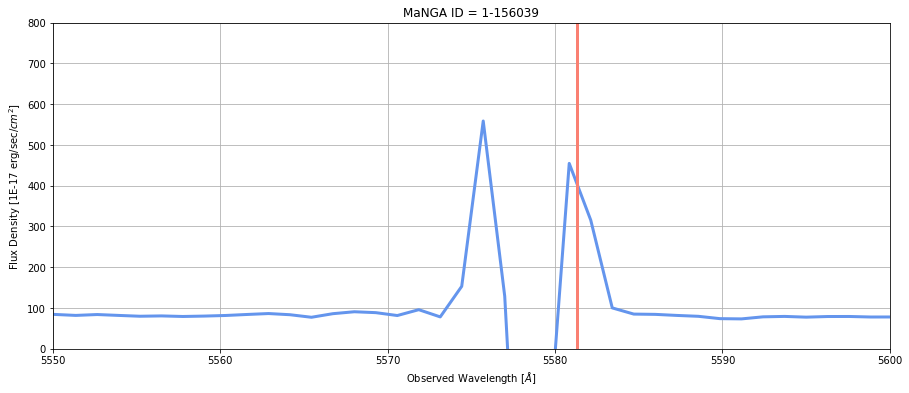

In [45]:
# start = 5578
# end = 5585

start = 5550
end = 5600
height = 800
plt.figure(figsize = (15,6))
plt.grid()
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.xlim(start, end)
plt.ylim(0,height)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

In [46]:
# select peak region
index = -1
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
yaxis = yaxis[1:]
print(yaxis)
print(len(yaxis))

# for i in yaxis:
#     print(wave[i])

[1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868
 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882
 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892]
38


In [19]:
flux_compare = [] 
ivar_compare = []

for i in yaxis:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)

len(flux_compare[0]), len(ivar_compare)

(1936, 77)

In [20]:
result = []
sumresult = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        if flux_compare[i][j] < (3 * sigma):
            result.append(0)
        else:
            result.append(flux_compare[i][j])
    sumresult.append(np.sum(result))
    result = []

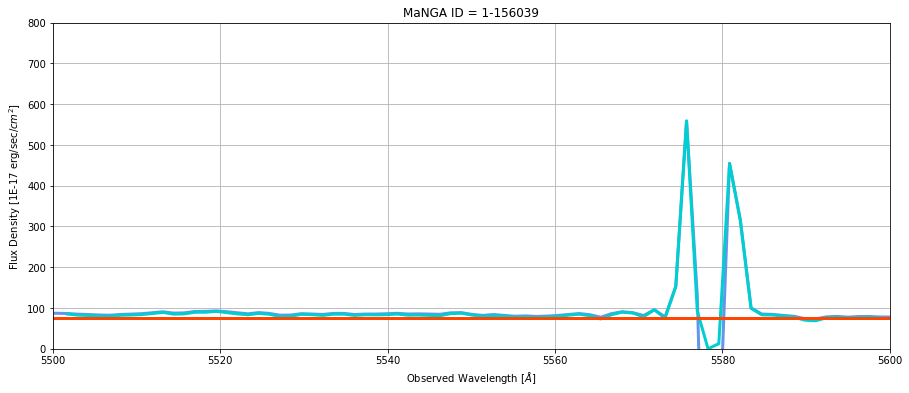

In [21]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [22]:
line1 = 5579.5
line2 = 5581.5
height1 = 0
height2 = 600

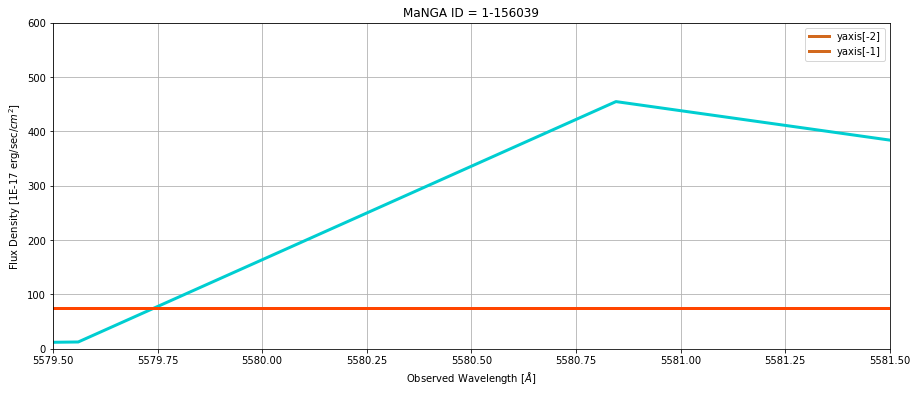

In [23]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[0]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955

# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [24]:
sumresult[0]

85.13568470440805

In [25]:
index2 = np.where(yaxis == yaxis[1])[0][0]
print(index2)
sumresult[index2]

1


82.58451352454722

In [26]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis[0]], wave[yaxis[1]]]
y = [sumresult[0], sumresult[1]]
print(x)
print(y)
print(sumresult[index2])

[5501.739205107149, 5503.006173234572]
[85.13568470440805, 82.58451352454722]
82.58451352454722


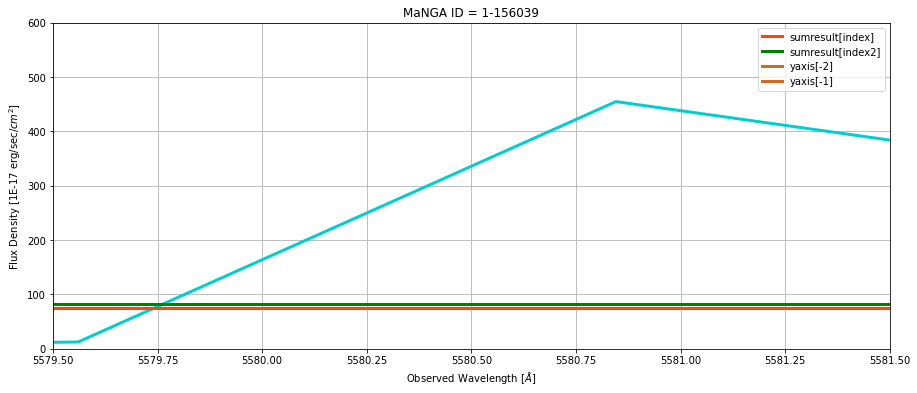

In [27]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'sumresult[index]')
plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.axvline(wave[yaxis[0]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.plot(x, y, marker = 'h', ms = 10, color = 'deeppink')



plt.legend()
#1954 1955

# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [28]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-2.0136032822311036

In [29]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

11163.455806087706

In [30]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [31]:
xval = func(sumresult[index], m, c)
xval

75.39387199096382 -2.0136032822311036 11163.455806087706


5506.577205124039

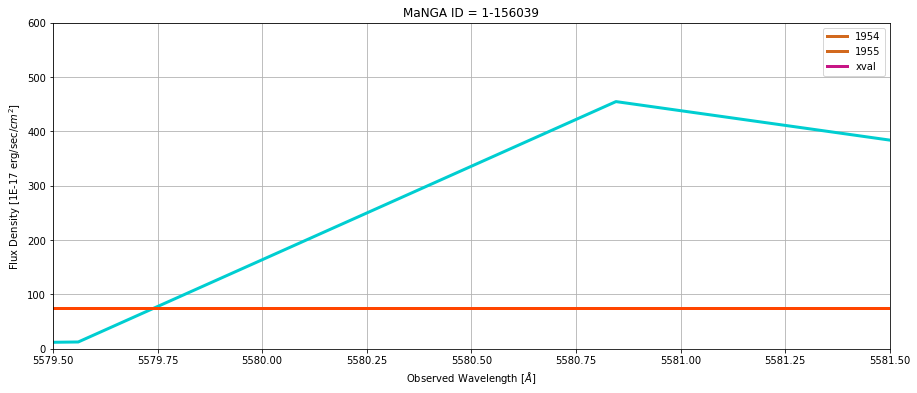

In [32]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[0]], color = 'chocolate', linewidth = 3, label = '1954')
plt.axvline(wave[yaxis[1]], color = 'chocolate', linewidth = 3, label = '1955')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = 'xval')

plt.legend()
#1954 1955

# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [33]:
xcoord = []
ycoord = []

ycoord.append(sumresult[index])

for i in range(yaxis[0], yaxis[-1]):
    xcoord.append(wave[i])
    
xcoord[0] = xval
# xcoord.append(5587)
xcoord.append(wave[yaxis[-1]])
    
for i in range(1, len(sumresult)):
    ycoord.append(sumresult[i])

len(xcoord), len(sumresult), len(ycoord)
print(xcoord)
print(ycoord)
# print(wave[yaxis])

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

[5506.577205124039, 5503.006173234572, 5504.273433125772, 5505.540984847947, 5506.808828468291, 5508.076964054036, 5509.345391672404, 5510.614111390659, 5511.883123276055, 5513.152427395885, 5514.422023817434, 5515.691912608028, 5516.9620938349835, 5518.232567565654, 5519.503333867388, 5520.774392807573, 5522.045744453587, 5523.317388872846, 5524.589326132767, 5525.861556300781, 5527.134079444351, 5528.406895630934, 5529.680004928025, 5530.953407403111, 5532.227103123719, 5533.501092157366, 5534.775374571609, 5536.049950434, 5537.3248198121255, 5538.599982773566, 5539.875439385942, 5541.151189716864, 5542.427233833984, 5543.703571804945, 5544.980203697426, 5546.257129579105, 5547.534349517692, 5548.8118635809, 5550.089671836454, 5551.367774352108, 5552.646171195634, 5553.924862434803, 5555.203848137405, 5556.483128371262, 5557.762703204188, 5559.042572704037, 5560.322736938655, 5561.603195975926, 5562.883949883727, 5564.164998729974, 5565.446342582577, 5566.72798150948, 5568.0099155786

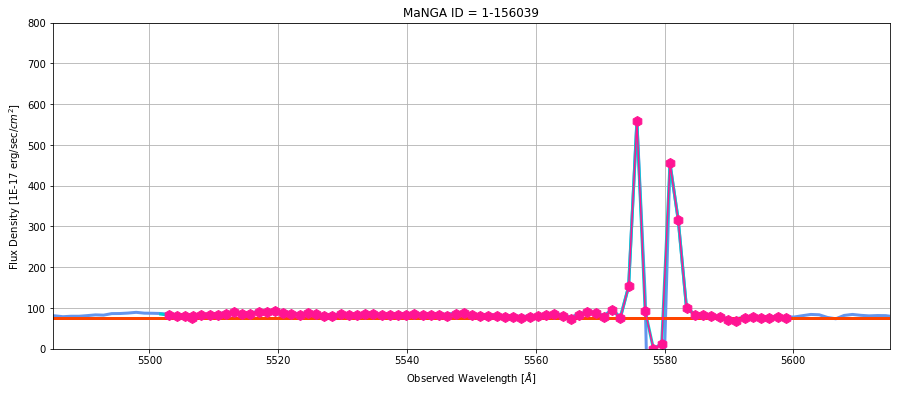

In [34]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start-15, end+15)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.plot(xcoord, ycoord, color = 'deeppink', marker = 'h', ms = 10)
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')

# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [35]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [36]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

8917.11453054242

In [37]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

6957.938178547167

In [38]:
fluxarea = finalarea - subtract
fluxarea

1959.1763519952528

In [39]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.114699

### With the subtraction 

In [40]:
luminosity_distance = Mpc_to_cm(533.1)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.644976008e+27 cm / 6.661967817079281e+41 erg/s (?)


In [41]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

In [42]:
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

M_BH / M_sol = 16899326.045633174
log(luminosity) = 41.82360253035176
log(M_BH / M_sol) = 7.2278693850575255
log(luminosity / sol_lum) = 8.238593250449298


### Without the subtraction

In [43]:
luminosity_without_subtract = luminosity_calc(luminosity_distance, finalarea)
print(luminosity_distance, 'cm', '/', luminosity_without_subtract, ('erg/s (?)'))

1.644976008e+27 cm / 3.0321685928468965e+42 erg/s (?)


In [44]:
print('M_BH / M_sol =',BH_calc(luminosity_without_subtract))
print('log(luminosity) =',np.log10(luminosity_without_subtract))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_without_subtract)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_without_subtract / sol_luminosity))

M_BH / M_sol = 76916621.45902355
log(luminosity) = 42.481753345016585
log(M_BH / M_sol) = 7.886020199722352
log(luminosity / sol_lum) = 8.896744065114124
